In [1]:
import sys
sys.path.append("../../../../../src")
import nanonets
import nanonets_utils
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
import numpy as np
import pandas as pd
%matplotlib inline

plt.style.use(["science","bright"])

def capacitance(radius):
    factor  = 4*3.14159265359*8.85418781762039*0.001*3.9
    cap     = factor*radius
    return cap

def min_max_scale(arr, error):
    arr_max     = np.max(arr)
    arr_min     = np.min(arr)
    arr_new     = (arr-arr_min)/(arr_max-arr_min)
    error_new   = error / (arr_max - arr_min)
    return arr_new, error_new

In [4]:
folder  = "/home/j/j_mens07/mnt/j_mens07/data/2_funding_period/potential/time_scale/"
t_vals  = np.arange(19999)*1e-7*1e6
N_vals  = [3,5,7,9,11]
R_vals  = [1e1,1e2,1e3,1e4,1e5,1e6,1e7]

data    = {}
for N_p in N_vals:
    dic         = {radius : pd.read_csv(f"{folder}Nx={N_p}_Ny={N_p}_Nz=1_Ne=8_{i}.csv") for i, radius in enumerate(R_vals)}
    data[N_p]   = dic
x_vals  = data[3][1e1]['E0'].values

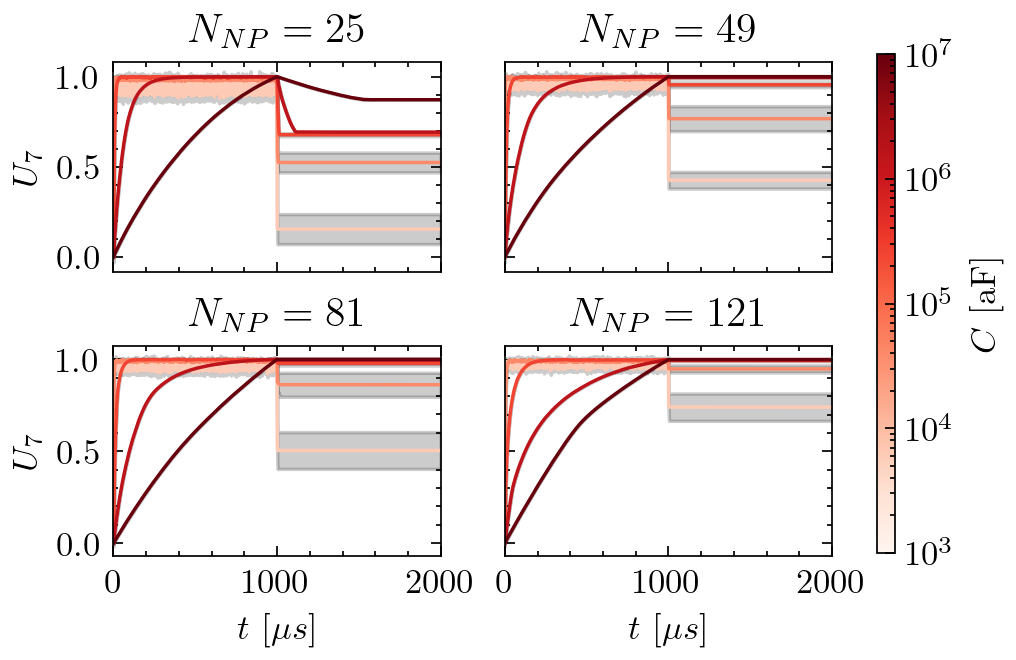

In [8]:
start       = 0
fig         = plt.figure(dpi=250, layout='constrained')
colormap    = 'Reds'
cmap        = plt.get_cmap(colormap)
R_vals_new  = [1e3,1e4,1e5,1e6,1e7]

for i, N_p in enumerate(N_vals[1:]):

    ax      = fig.add_subplot(2,2,i+1)

    for j, R_val in enumerate(R_vals_new):

        vals            = data[N_p][R_val].loc[start:,'Current'].values*1000
        error           = data[N_p][R_val].loc[start:,'Error'].values*1000
        vals_s, error_s = min_max_scale(vals, error)
        t_steps         = t_vals[start:]

        ax.plot(t_steps, vals_s, color=cmap((j+1)/len(R_vals_new)))
        ax.fill_between(t_vals, vals_s-error_s, vals_s+error_s, color='black', alpha=0.2)
        ax.set_xlim(0,2000)

    if i >= 2:
        ax.set_xlabel("$t$ [$\mu s$]")
    else:
        ax.set_xticklabels("")
    if i % 2 == 0:
        ax.set_ylabel("$U_7$")
    else:
        ax.set_yticklabels("")

    ax.set_title("$N_{NP} = "+f"{N_p**2}$")

cbar_ax = fig.add_axes([1., 0.16, 0.02, 0.76])
norm    = mpl.colors.LogNorm(vmin=R_vals_new[0], vmax=R_vals_new[-1])
cbar    = mpl.cm.ScalarMappable(norm=norm, cmap=colormap)
fig.colorbar(cbar, cax=cbar_ax, label='$C$ [aF]')

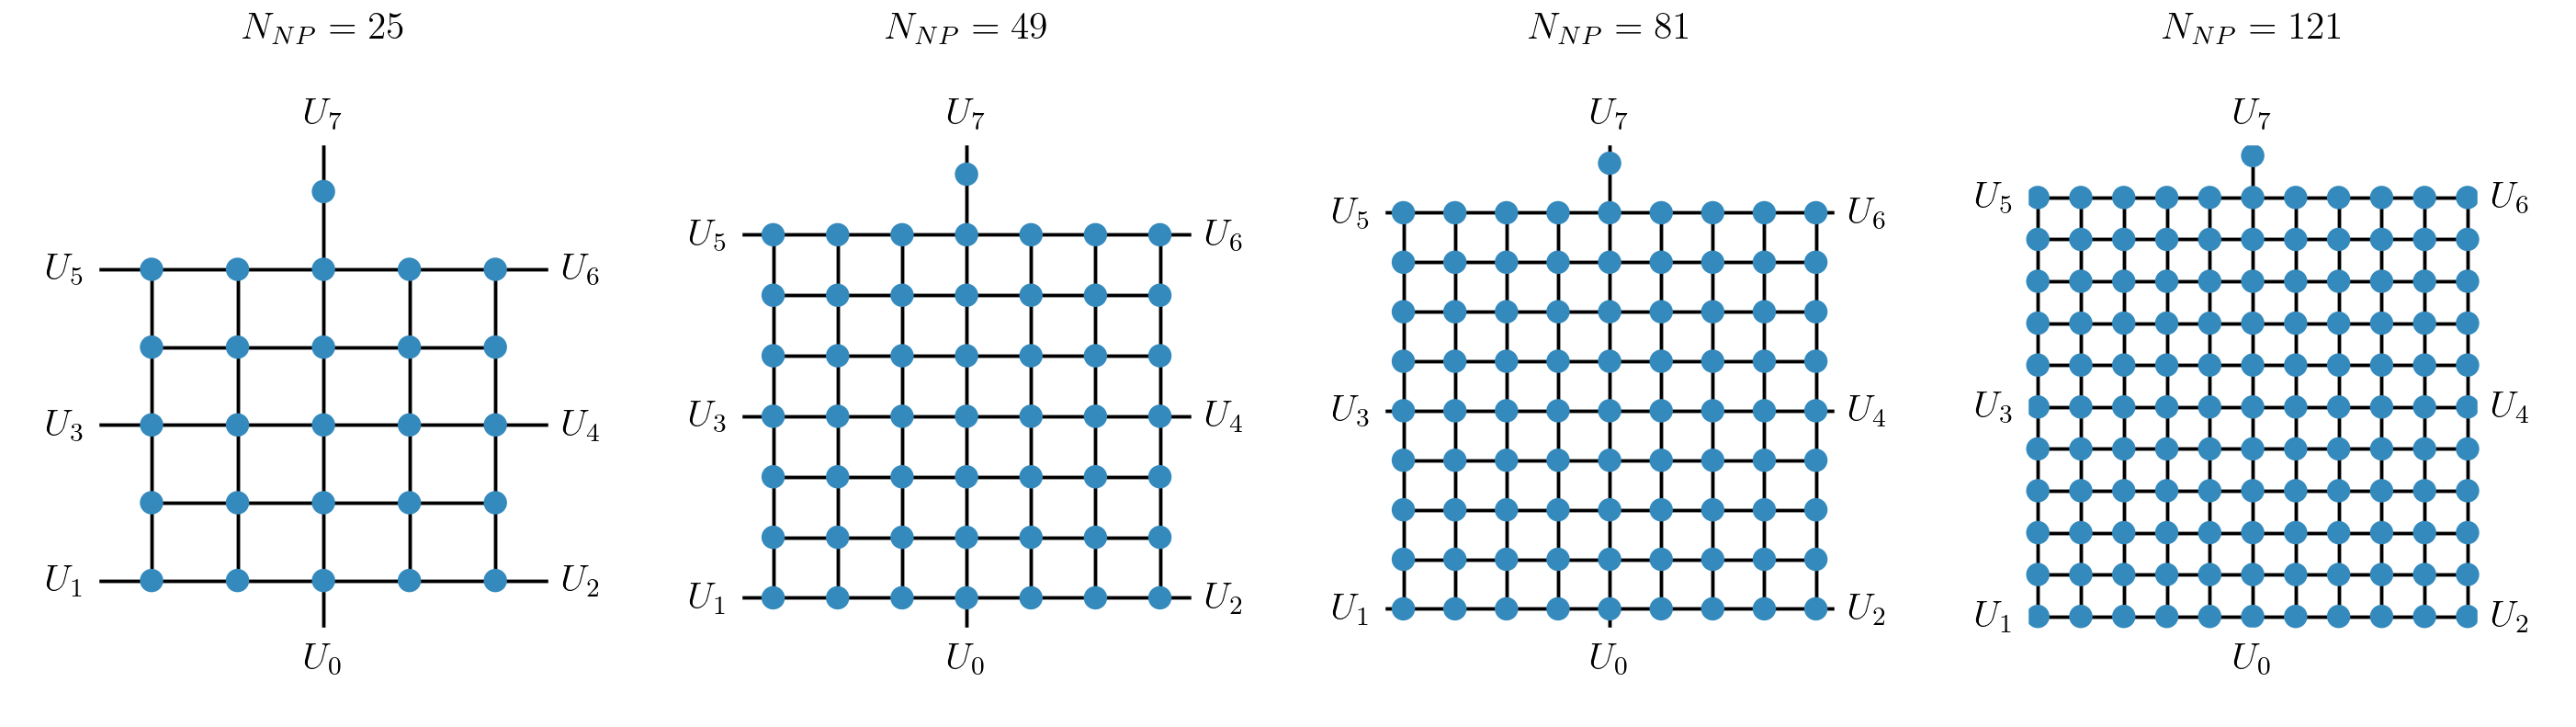

In [10]:
fig = plt.figure(dpi=250, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*3.2)
fig.set_figheight(fig.get_figheight()*1.2)

for i, N_p in enumerate(N_vals[1:]):
    ax                  = fig.add_subplot(1,4,i+1)
    topology_parameter  = {
        "Nx"                : N_p,
        "Ny"                : N_p,
        "Nz"                : 1,
        "e_pos"             : [[(N_p-1)//2,0,0],[0,0,0],[N_p-1,0,0],
                                [0,(N_p-1)//2,0],[N_p-1,(N_p-1)//2,0],
                                [0,N_p-1,0],[N_p-1,N_p-1,0],[(N_p-1)//2,N_p-1,0]],
        "electrode_type"    : ['constant','constant','constant',
                                'constant','constant','constant',
                                'constant','floating']
    }

    sim_class   = nanonets.simulation(topology_parameter=topology_parameter)
    fig, ax     = nanonets_utils.display_network(np_network_sim=sim_class, fig=fig, ax=ax, node_size=40,
                                                 provide_electrode_labels=[f"$U_{i}$" for i in range(8)], font_size=12)
    ax.set_title("$N_{NP} = "+f"{N_p**2}$")
